In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T1_PPS_FILE = '../Mediciones/PPS_SIC_2.bin'
T2_PPS_FILE = '../Mediciones/pps_server_2.bin'
REAL_PHI_FILE = '../Mediciones/real_phi.bin'

In [3]:
t1_pps = np.fromfile(T1_PPS_FILE)
t2_pps = np.fromfile(T2_PPS_FILE)

In [4]:
import time

In [5]:
t1_s = time.strftime('%d-%m-%Y %H:%M:%S', time.localtime(t1_pps[0]//1000000))
t1_e = time.strftime('%d-%m-%Y %H:%M:%S', time.localtime(t1_pps[-1]//1000000))
t2_s = time.strftime('%d-%m-%Y %H:%M:%S', time.localtime(t2_pps[0]//1000000))
t2_e = time.strftime('%d-%m-%Y %H:%M:%S', time.localtime(t2_pps[-1]//1000000))

In [6]:
print(t1_s)
print(t2_s)
print(t1_e)
print(t2_e)

08-12-2018 23:11:08
08-12-2018 23:11:08
10-12-2018 20:32:49
10-12-2018 20:32:49


In [7]:
min_len = min(len(t1_pps),len(t2_pps))
t1_pps = t1_pps[:min_len]
t2_pps = t2_pps[:min_len]

In [8]:
real_phi = t1_pps - t2_pps

Text(0,0.5,'Phi [us]')

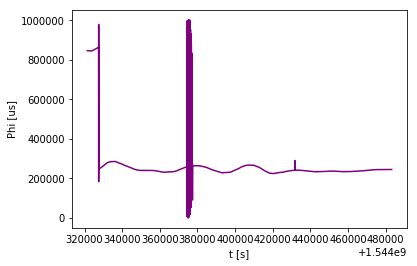

In [9]:
plt.plot(t1_pps/1e6,real_phi % 1000000,c='purple')
plt.xlabel('t [s]')
plt.ylabel('Phi [us]')

Hay que alinear los pps:

In [10]:
from align_pps import align_pps

In [11]:
t1_pps , t2_pps = align_pps(t1_pps,t2_pps)

In [12]:
t1_pps.tofile("../Mediciones/t1_pps_aligned.bin")
t2_pps.tofile("../Mediciones/t2_pps_aligned.bin")

In [13]:
real_phi = t1_pps - t2_pps

Text(0,0.5,'Phi [us]')

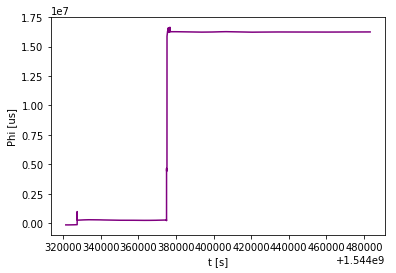

In [14]:
plt.plot(t1_pps/1e6,real_phi,'purple')
plt.xlabel('t [s]')
plt.ylabel('Phi [us]')

In [15]:
real_phi = real_phi % 1000000

Text(0,0.5,'Phi [us]')

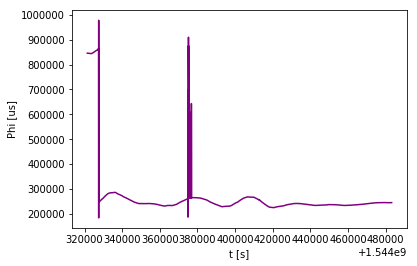

In [16]:
plt.plot(t1_pps/1e6,real_phi,'purple')
plt.xlabel('t [s]')
plt.ylabel('Phi [us]')

In [17]:
real_phi.tofile(REAL_PHI_FILE)